In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
import time

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Data and target arrays
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

# Shape parameters
n_samples, h, w = lfw_people.images.shape
n_features = X.shape[1]
n_classes = target_names.shape[0]

print(f"n_samples: {n_samples}, n_features: {n_features}, n_classes: {n_classes}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_samples: 1288, n_features: 1850, n_classes: 7


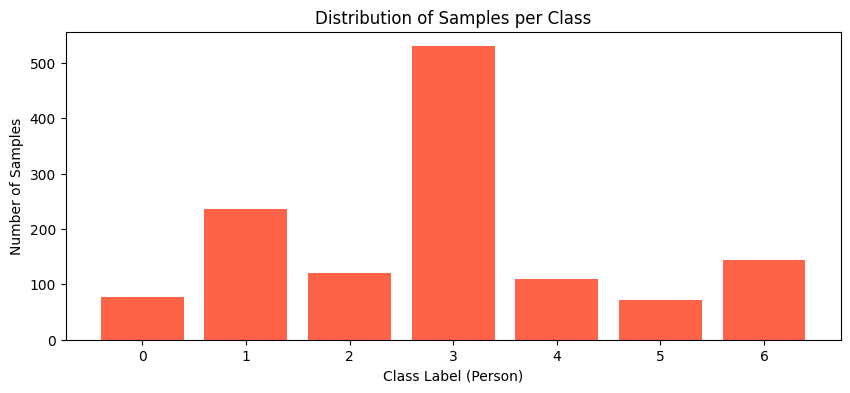

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Count the number of samples per class
class_counts = np.bincount(y)
plt.figure(figsize=(10, 4))
plt.bar(range(n_classes), class_counts, color='tomato')
plt.xlabel('Class Label (Person)')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples per Class')
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Data and target arrays
X = lfw_people.data  # Feature vectors (grayscale pixel intensities)
y = lfw_people.target  # Class labels (persons)
target_names = lfw_people.target_names  # Names of the persons

# Shape of the dataset
n_samples, h, w = lfw_people.images.shape  # n_samples = number of images, h = height, w = width
n_features = X.shape[1]  # n_features = h * w (i.e., number of pixels per image)
n_classes = len(target_names)  # Number of unique persons (classes)

# Print basic dataset information
print(f"Dataset information:")
print(f"Number of samples (images): {n_samples}")
print(f"Image dimensions: {h} x {w}")
print(f"Number of features (pixels per image): {n_features}")
print(f"Number of classes (persons): {n_classes}")
print(f"Class names: {target_names}")

# Initial analysis - distribution of samples per class
class_counts = np.bincount(y)
print(f"\nNumber of samples per class:\n")
for i, count in enumerate(class_counts):
    print(f"{target_names[i]}: {count} samples")


# Dimensionality information
print(f"\nDimensionality of the feature vectors:")
print(f"Each image is represented by a vector of {n_features} features (50 x 37 pixels).")


Dataset information:
Number of samples (images): 1288
Image dimensions: 50 x 37
Number of features (pixels per image): 1850
Number of classes (persons): 7
Class names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']

Number of samples per class:

Ariel Sharon: 77 samples
Colin Powell: 236 samples
Donald Rumsfeld: 121 samples
George W Bush: 530 samples
Gerhard Schroeder: 109 samples
Hugo Chavez: 71 samples
Tony Blair: 144 samples

Dimensionality of the feature vectors:
Each image is represented by a vector of 1850 features (50 x 37 pixels).


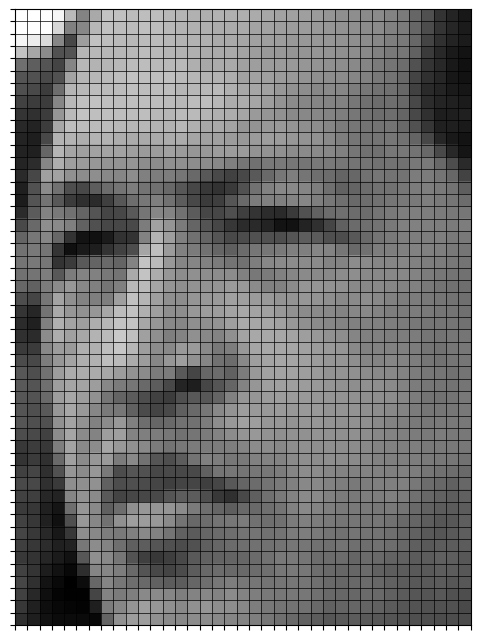

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
h, w = lfw_people.images.shape[1], lfw_people.images.shape[2]

# Select a sample image (reshaped to its original size)
image = X[0].reshape((h, w))

# Create the plot
plt.figure(figsize=(8, 8))

# Display the image using imshow with nearest interpolation (no blurring of pixels)
plt.imshow(image, cmap='gray', interpolation='nearest')

# Add grid lines to create equal spacing between the pixels
plt.grid(True, color='black', linewidth=0.5)  # Add grid with a thin black line
plt.xticks(np.arange(-0.5, w, 1), [])  # Disable the tick labels
plt.yticks(np.arange(-0.5, h, 1), [])  # Disable the tick labels
# Show the plot
plt.show()


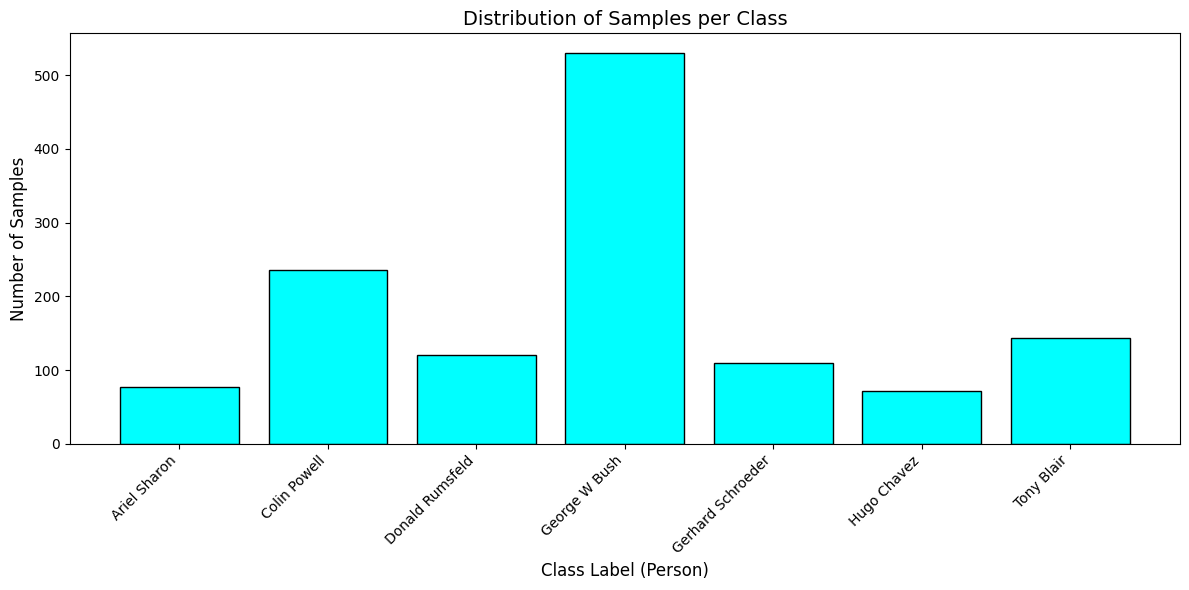

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Data and target arrays
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

# Shape parameters
n_samples, h, w = lfw_people.images.shape
n_features = X.shape[1]
n_classes = target_names.shape[0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Count the number of samples per class
class_counts = np.bincount(y)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(n_classes), class_counts, color='aqua', edgecolor='black')

# Add labels and title
plt.xlabel('Class Label (Person)', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Distribution of Samples per Class', fontsize=14)

# Add class names as x-axis labels
plt.xticks(range(n_classes), target_names, rotation=45, ha='right', fontsize=10)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


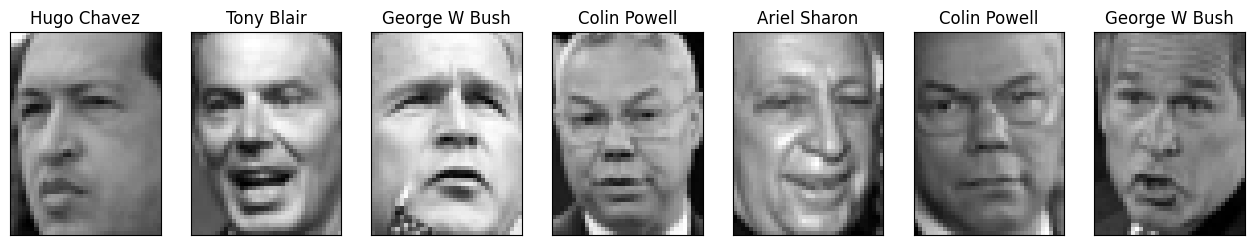

In [ ]:
def plot_sample_faces(images, titles, h, w, n_row=1, n_col=7):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Display a few sample images from the dataset
sample_titles = [target_names[y[i]] for i in range(10)]
plot_sample_faces(X, sample_titles, h, w)
plt.show()

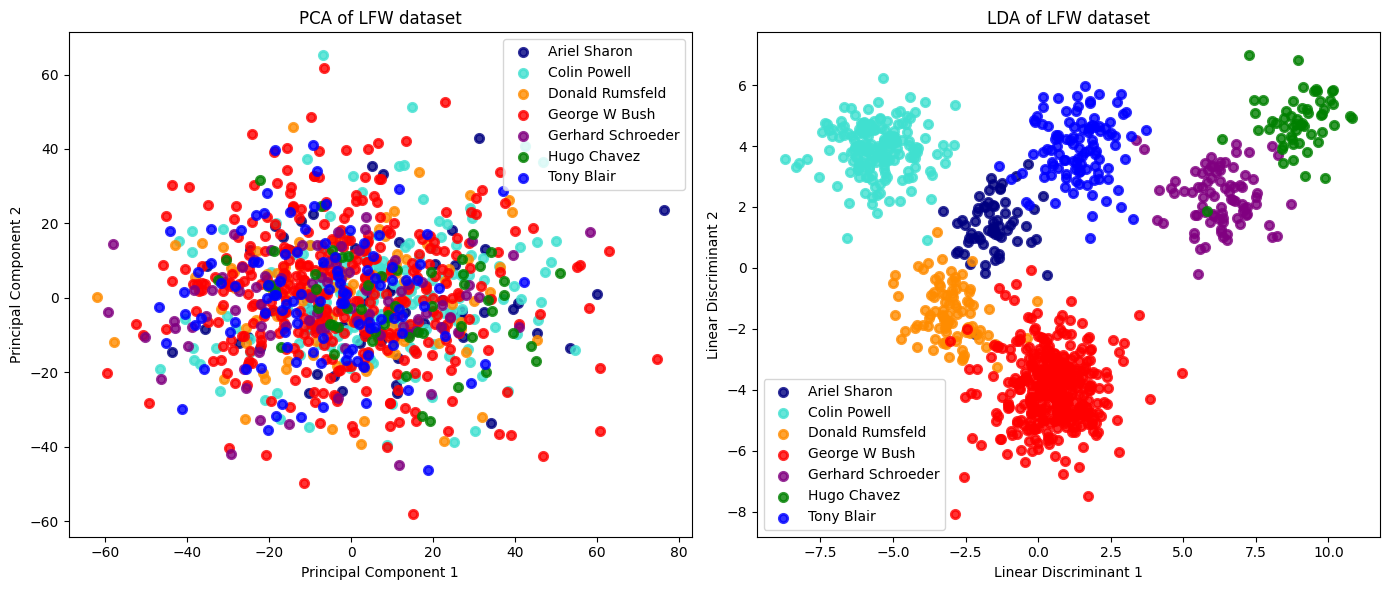

In [ ]:
# Apply PCA
pca = PCA(n_components=2)  # Only take the first 2 components for plotting
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply LDA
lda = LDA(n_components=2)  # Only take the first 2 components for plotting
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Create subplots to place plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot PCA result
colors = ["navy", "turquoise", "darkorange", "red", "purple", "green", "blue"]
lw = 2

for color, i, target_name in zip(colors, range(n_classes), target_names):
    ax1.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], alpha=0.8, color=color, lw=lw, label=target_name)
ax1.set_title("PCA of LFW dataset")
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.legend(loc="best", shadow=False, scatterpoints=1)

# Plot LDA result
for color, i, target_name in zip(colors, range(n_classes), target_names):
    ax2.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], alpha=0.8, color=color, lw=lw, label=target_name)
ax2.set_title("LDA of LFW dataset")
ax2.set_xlabel('Linear Discriminant 1')
ax2.set_ylabel('Linear Discriminant 2')
ax2.legend(loc="best", shadow=False, scatterpoints=1)

plt.tight_layout()
plt.show()

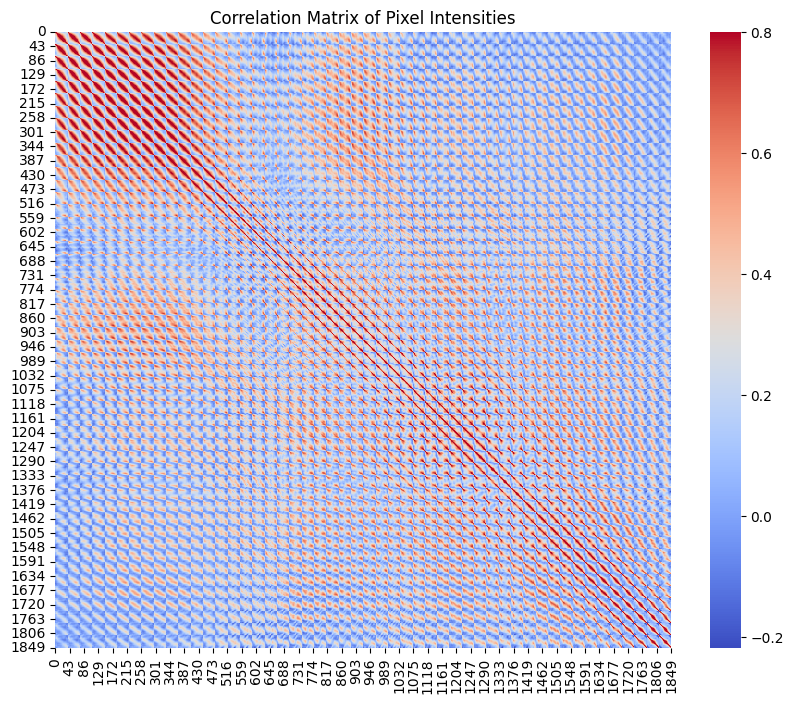

In [ ]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = np.corrcoef(X.T)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmax=0.8, square=True)
plt.title('Correlation Matrix of Pixel Intensities')
plt.show()

PCA-based Model Performance:
                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.69      0.67        13
     Colin Powell       0.73      0.85      0.78        60
  Donald Rumsfeld       0.71      0.74      0.73        27
    George W Bush       0.90      0.90      0.90       146
Gerhard Schroeder       0.82      0.72      0.77        25
      Hugo Chavez       0.75      0.60      0.67        15
       Tony Blair       0.87      0.75      0.81        36

         accuracy                           0.82       322
        macro avg       0.78      0.75      0.76       322
     weighted avg       0.83      0.82      0.82       322



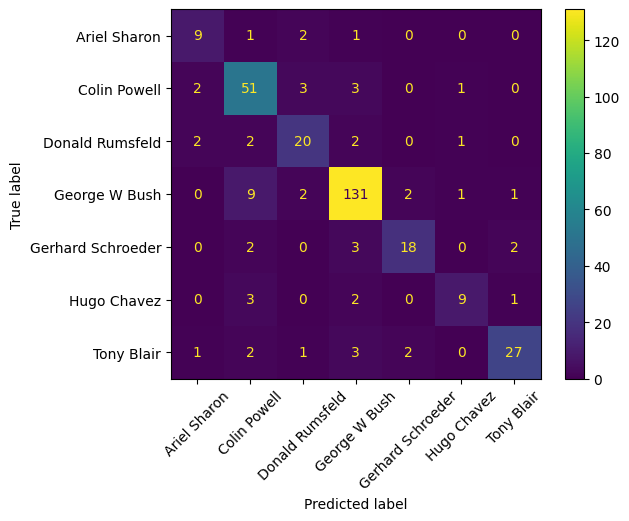

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import time

# Apply PCA
n_components = 150
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM with PCA
param_grid = {'C': loguniform(1e3, 1e4), 'gamma': loguniform(0.0001, 0.001)}
clf_pca = RandomizedSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, n_iter=10, cv=5, random_state=42)
clf_pca.fit(X_train_pca, y_train)

# Predict and evaluate PCA-based model
y_pred_pca = clf_pca.predict(X_test_pca)
print("PCA-based Model Performance:")
print(classification_report(y_test, y_pred_pca, target_names=target_names))

ConfusionMatrixDisplay.from_estimator(clf_pca, X_test_pca, y_test, display_labels=target_names, xticks_rotation=45)
plt.show()


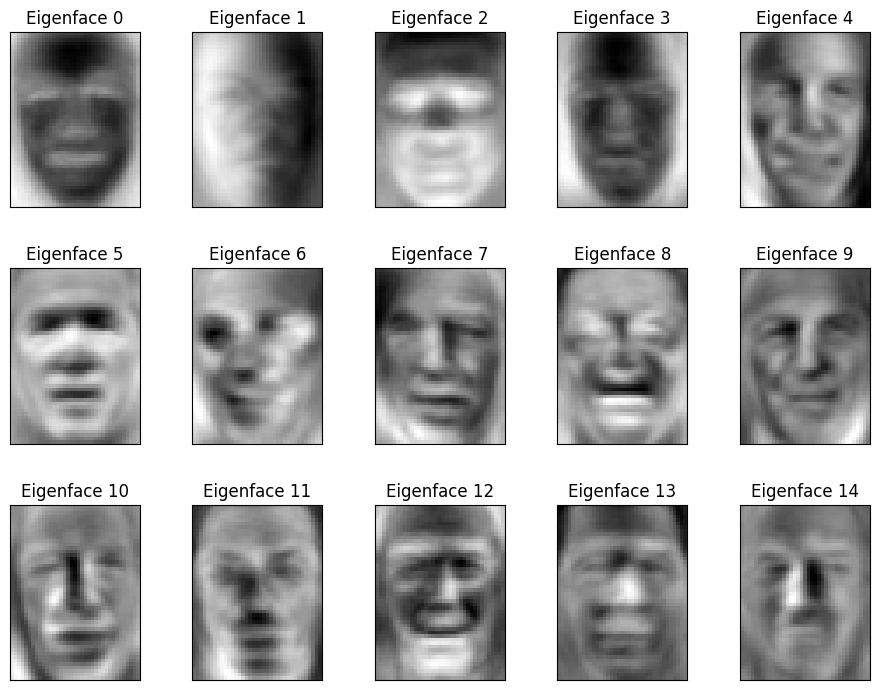

In [ ]:
from sklearn.decomposition import PCA

# Define the number of components (eigenfaces)
n_components = 150

# Apply PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
X_train_pca = pca.fit_transform(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

# Visualize the eigenfaces
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = [f"Eigenface {i}" for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=3, n_col=5)
plt.show()

LDA-based Model Performance:
                   precision    recall  f1-score   support

     Ariel Sharon       0.47      0.62      0.53        13
     Colin Powell       0.69      0.67      0.68        60
  Donald Rumsfeld       0.50      0.59      0.54        27
    George W Bush       0.85      0.74      0.79       146
Gerhard Schroeder       0.55      0.64      0.59        25
      Hugo Chavez       0.50      0.67      0.57        15
       Tony Blair       0.64      0.69      0.67        36

         accuracy                           0.69       322
        macro avg       0.60      0.66      0.63       322
     weighted avg       0.71      0.69      0.70       322



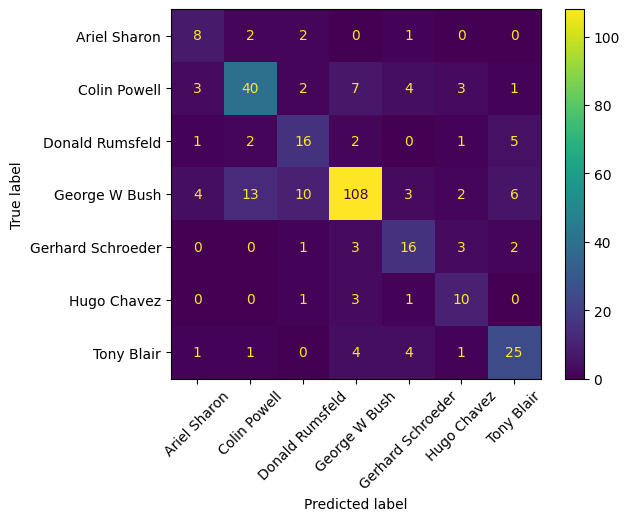

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply LDA
lda = LDA(n_components=n_classes-1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train SVM with LDA
param_grid = {'C': loguniform(1e3, 1e4), 'gamma': loguniform(0.0001, 0.001)}
clf_lda = RandomizedSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, n_iter=10, cv=5,\
                             random_state=42)
clf_lda.fit(X_train_lda, y_train)

# Predict and evaluate LDA-based model
y_pred_lda = clf_lda.predict(X_test_lda)
print("LDA-based Model Performance:")
print(classification_report(y_test, y_pred_lda, target_names=target_names))

ConfusionMatrixDisplay.from_estimator(clf_lda, X_test_lda, y_test, display_labels=target_names,\
                                      xticks_rotation=45)
plt.show()


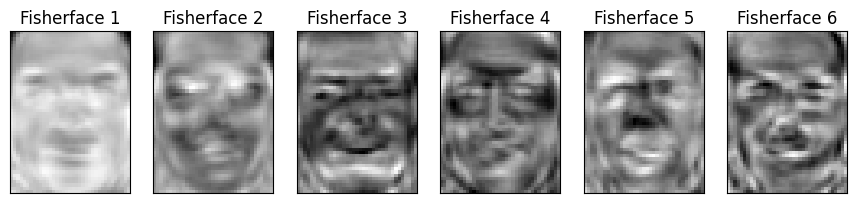

In [ ]:
# Apply PCA (Principal Component Analysis)
n_components_pca = 150
pca = PCA(n_components=n_components_pca, svd_solver='randomized', whiten=True).fit(X)

X_pca = pca.transform(X)

# Apply LDA (Linear Discriminant Analysis)
n_components_lda = min(n_classes - 1, n_components_pca)  # Ensure the number of LDA components doesn't exceed available PCA components
lda = LDA(n_components=n_components_lda)
X_lda = lda.fit_transform(X_pca, y)

# Compute Fisherfaces in the original space
fisherfaces = np.dot(lda.scalings_.T, pca.components_[:n_components_pca])

# Plot Fisherfaces
def plot_fisherfaces(fisherfaces, h, w, title="Fisherfaces", n_row=1, n_col=6):
    n_faces = n_row * n_col
    plt.figure(figsize=(1.8 * n_col, 2.8 * n_row))
    # plt.suptitle(title, size=16)  # Comment or remove this line to remove the title
    for i in range(min(fisherfaces.shape[0], n_faces)):  # Ensure we don't exceed the available Fisherfaces
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(fisherfaces[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"Fisherface {i + 1}", size=12)
        plt.xticks(())
        plt.yticks(())

plot_fisherfaces(fisherfaces, h, w, title="Fisherfaces")
plt.show()



Evaluating with 1 LDA components
LDA-based Model Performance with 1 components:
                   precision    recall  f1-score   support

     Ariel Sharon       0.02      0.08      0.03        13
     Colin Powell       0.46      0.47      0.46        60
  Donald Rumsfeld       0.12      0.19      0.15        27
    George W Bush       0.61      0.23      0.33       146
Gerhard Schroeder       0.22      0.36      0.27        25
      Hugo Chavez       0.47      0.47      0.47        15
       Tony Blair       0.16      0.28      0.20        36

         accuracy                           0.29       322
        macro avg       0.29      0.29      0.27       322
     weighted avg       0.43      0.29      0.31       322



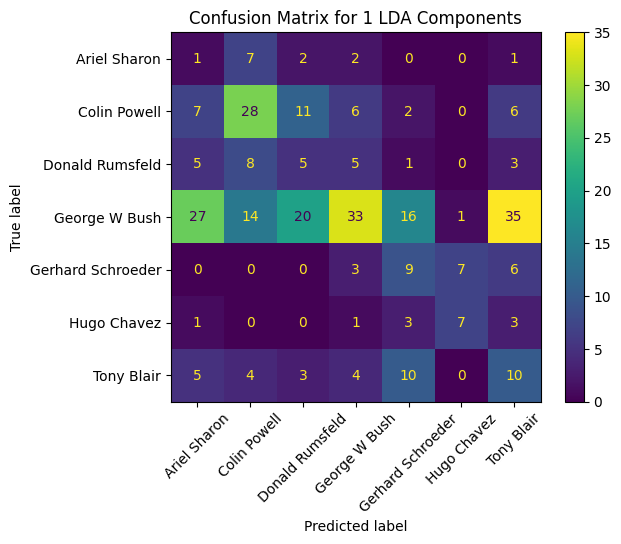


Evaluating with 2 LDA components
LDA-based Model Performance with 2 components:
                   precision    recall  f1-score   support

     Ariel Sharon       0.06      0.15      0.09        13
     Colin Powell       0.62      0.53      0.57        60
  Donald Rumsfeld       0.21      0.33      0.26        27
    George W Bush       0.88      0.63      0.73       146
Gerhard Schroeder       0.32      0.44      0.37        25
      Hugo Chavez       0.38      0.33      0.36        15
       Tony Blair       0.27      0.33      0.30        36

         accuracy                           0.51       322
        macro avg       0.39      0.39      0.38       322
     weighted avg       0.61      0.51      0.54       322



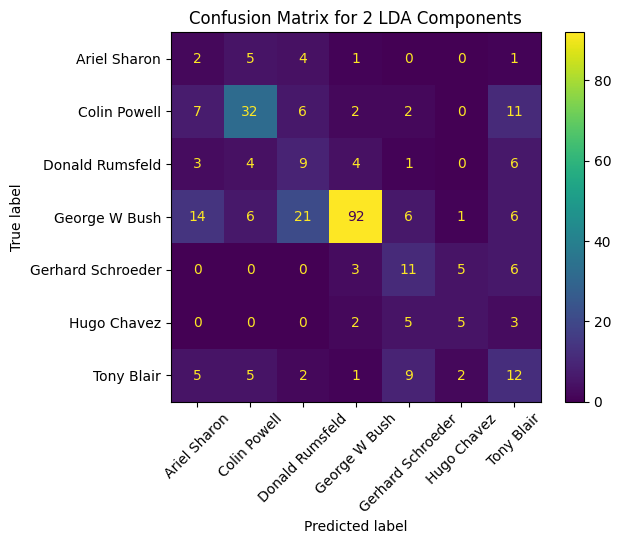


Evaluating with 5 LDA components
LDA-based Model Performance with 5 components:
                   precision    recall  f1-score   support

     Ariel Sharon       0.39      0.54      0.45        13
     Colin Powell       0.66      0.67      0.66        60
  Donald Rumsfeld       0.42      0.56      0.48        27
    George W Bush       0.87      0.73      0.80       146
Gerhard Schroeder       0.59      0.68      0.63        25
      Hugo Chavez       0.50      0.73      0.59        15
       Tony Blair       0.67      0.61      0.64        36

         accuracy                           0.68       322
        macro avg       0.58      0.65      0.61       322
     weighted avg       0.71      0.68      0.69       322



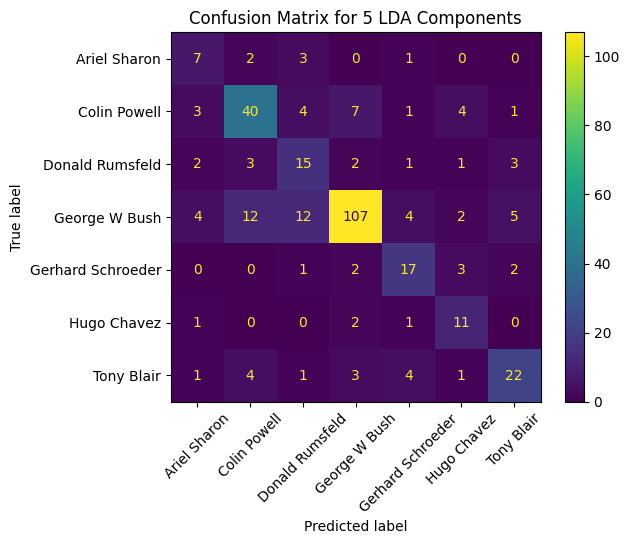


Evaluating with 6 LDA components
LDA-based Model Performance with 6 components:
                   precision    recall  f1-score   support

     Ariel Sharon       0.47      0.62      0.53        13
     Colin Powell       0.69      0.67      0.68        60
  Donald Rumsfeld       0.50      0.59      0.54        27
    George W Bush       0.85      0.74      0.79       146
Gerhard Schroeder       0.55      0.64      0.59        25
      Hugo Chavez       0.50      0.67      0.57        15
       Tony Blair       0.64      0.69      0.67        36

         accuracy                           0.69       322
        macro avg       0.60      0.66      0.63       322
     weighted avg       0.71      0.69      0.70       322



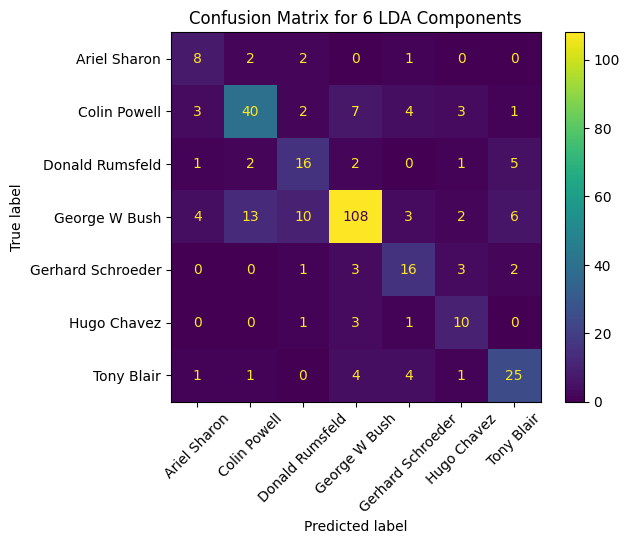

In [ ]:
### Experiment with Different Number of LDA Components ###
lda_components_list = [1, 2, 5, min(n_classes - 1, X_train.shape[1])]
results = []

for n_components in lda_components_list:
    print(f"\nEvaluating with {n_components} LDA components")

    # Measure time for LDA fitting and transformation
    start_time = time.time()
    lda = LDA(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train, y_train)
    lda_fit_time = time.time() - start_time

    start_time = time.time()
    X_test_lda = lda.transform(X_test)
    lda_transform_time = time.time() - start_time

    # SVM Training with LDA-transformed data
    clf_lda = RandomizedSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, n_iter=10, cv=5, random_state=42)
    start_time = time.time()
    clf_lda.fit(X_train_lda, y_train)
    lda_train_time = time.time() - start_time

    # Predict and evaluate LDA-based model
    y_pred_lda = clf_lda.predict(X_test_lda)
    report_lda = classification_report(y_test, y_pred_lda, target_names=target_names, output_dict=True)

    # Collect results
    results.append({
        'n_components': n_components,
        'accuracy': report_lda['accuracy'],
        'precision': report_lda['weighted avg']['precision'],
        'recall': report_lda['weighted avg']['recall'],
        'f1-score': report_lda['weighted avg']['f1-score'],
        'fit_time': lda_fit_time,
        'transform_time': lda_transform_time,
        'train_time': lda_train_time
    })

    # Display results
    print(f"LDA-based Model Performance with {n_components} components:")
    print(classification_report(y_test, y_pred_lda, target_names=target_names))
    ConfusionMatrixDisplay.from_estimator(clf_lda, X_test_lda, y_test, display_labels=target_names, xticks_rotation=45)
    plt.title(f"Confusion Matrix for {n_components} LDA Components")
    plt.show()

# Plot the performance metrics for different LDA components
components = [result['n_components'] for result in results]
accuracy = [result['accuracy'] for result in results]
precision = [result['precision'] for result in results]
recall = [result['recall'] for result in results]
f1_score = [result['f1-score'] for result in results]
fit_times = [result['fit_time'] for result in results]
transform_times = [result['transform_time'] for result in results]
train_times = [result['train_time'] for result in results]

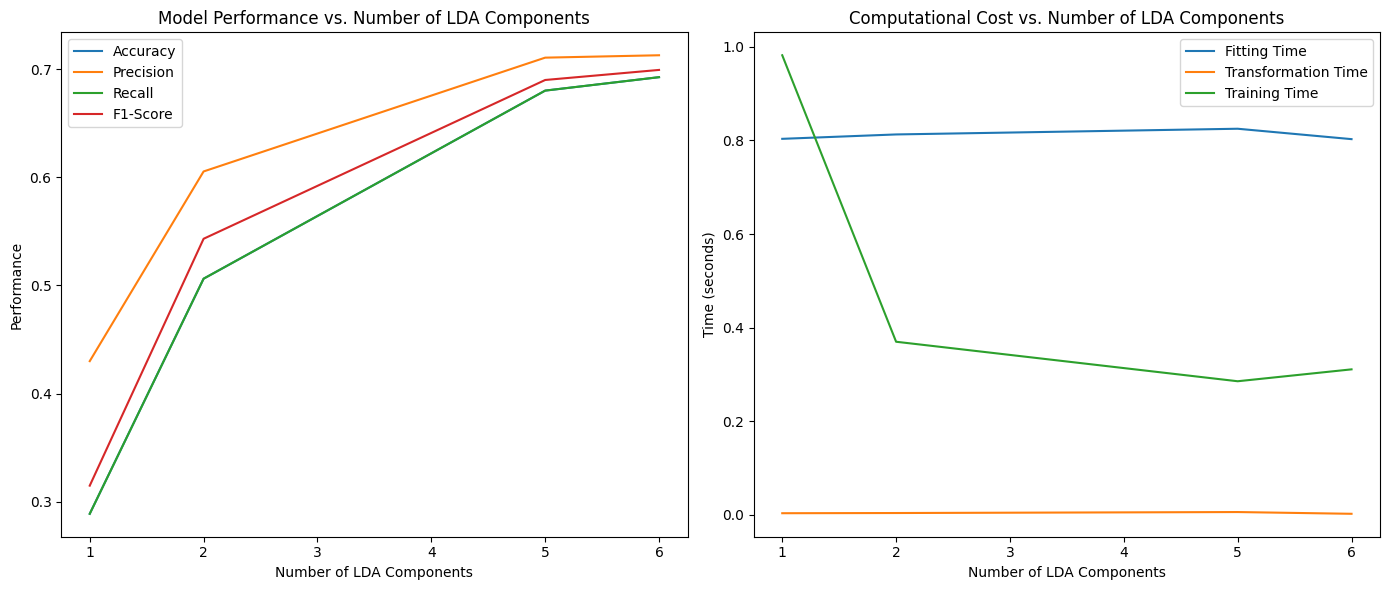

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(components, accuracy, label='Accuracy')
plt.plot(components, precision, label='Precision')
plt.plot(components, recall, label='Recall')
plt.plot(components, f1_score, label='F1-Score')
plt.xlabel('Number of LDA Components')
plt.ylabel('Performance')
plt.title('Model Performance vs. Number of LDA Components')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(components, fit_times, label='Fitting Time')
plt.plot(components, transform_times, label='Transformation Time')
plt.plot(components, train_times, label='Training Time')
plt.xlabel('Number of LDA Components')
plt.ylabel('Time (seconds)')
plt.title('Computational Cost vs. Number of LDA Components')
plt.legend()

plt.tight_layout()
plt.show()


Evaluating with 150 PCA components
PCA-based Model Performance with 150 components:
                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.77      0.74        13
     Colin Powell       0.73      0.87      0.79        60
  Donald Rumsfeld       0.67      0.67      0.67        27
    George W Bush       0.89      0.88      0.89       146
Gerhard Schroeder       0.83      0.80      0.82        25
      Hugo Chavez       0.70      0.47      0.56        15
       Tony Blair       0.90      0.78      0.84        36

         accuracy                           0.82       322
        macro avg       0.78      0.75      0.76       322
     weighted avg       0.82      0.82      0.82       322



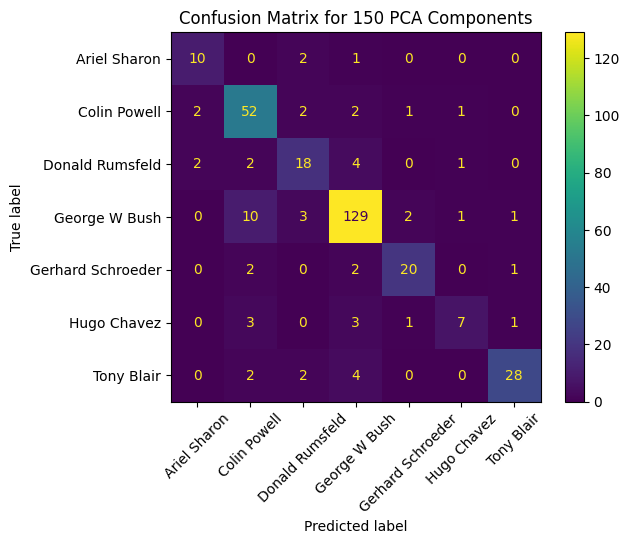


Evaluating with 200 PCA components
PCA-based Model Performance with 200 components:
                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.77      0.67        13
     Colin Powell       0.78      0.85      0.82        60
  Donald Rumsfeld       0.83      0.70      0.76        27
    George W Bush       0.93      0.95      0.94       146
Gerhard Schroeder       0.87      0.80      0.83        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.91      0.86      0.89        36

         accuracy                           0.86       322
        macro avg       0.82      0.79      0.80       322
     weighted avg       0.87      0.86      0.86       322



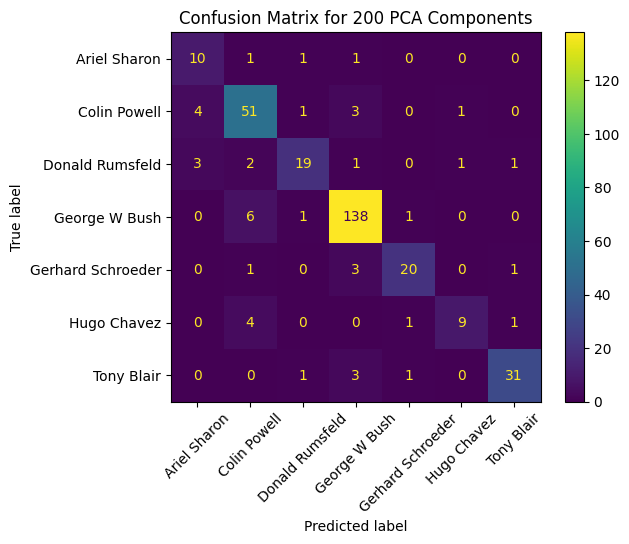


Evaluating with 300 PCA components
PCA-based Model Performance with 300 components:
                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.69      0.62        13
     Colin Powell       0.73      0.87      0.79        60
  Donald Rumsfeld       0.76      0.70      0.73        27
    George W Bush       0.92      0.90      0.91       146
Gerhard Schroeder       0.90      0.72      0.80        25
      Hugo Chavez       0.80      0.53      0.64        15
       Tony Blair       0.78      0.81      0.79        36

         accuracy                           0.83       322
        macro avg       0.78      0.75      0.76       322
     weighted avg       0.84      0.83      0.83       322



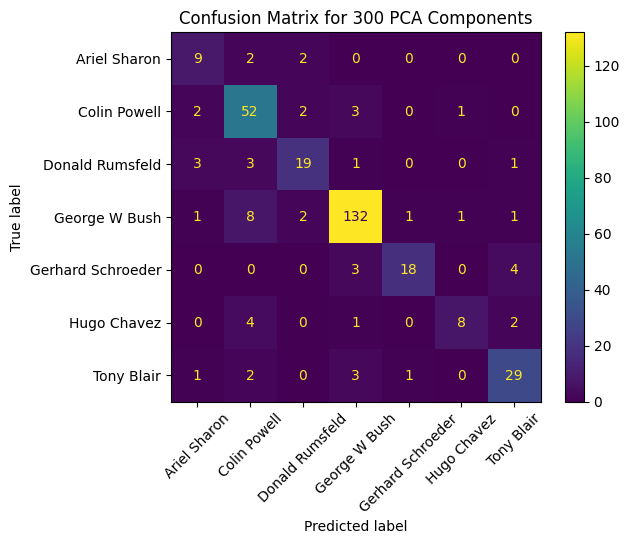


Evaluating with 350 PCA components
PCA-based Model Performance with 350 components:
                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.69      0.64        13
     Colin Powell       0.67      0.88      0.76        60
  Donald Rumsfeld       0.87      0.74      0.80        27
    George W Bush       0.88      0.87      0.88       146
Gerhard Schroeder       0.83      0.60      0.70        25
      Hugo Chavez       0.80      0.53      0.64        15
       Tony Blair       0.79      0.72      0.75        36

         accuracy                           0.80       322
        macro avg       0.78      0.72      0.74       322
     weighted avg       0.81      0.80      0.80       322



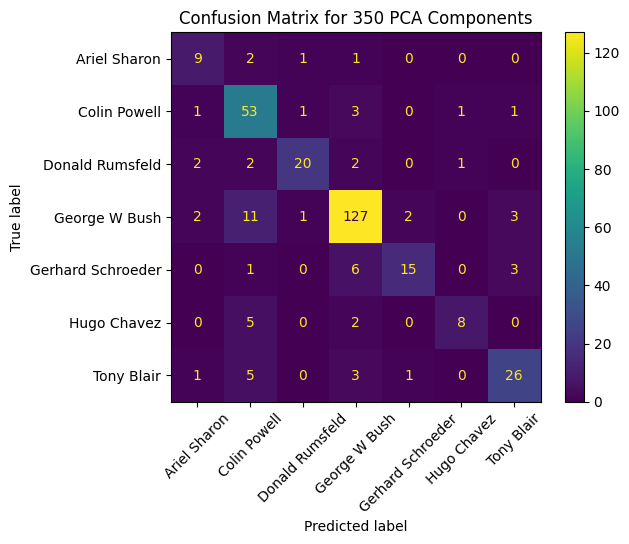

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
import time
import matplotlib.pyplot as plt

# List of different numbers of PCA components to test
pca_components_list = [150, 200, 300, 350]
pca_results = []

for n_components in pca_components_list:
    print(f"\nEvaluating with {n_components} PCA components")

    # Measure time for PCA fitting and transformation
    start_time = time.time()
    pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')
    X_train_pca = pca.fit_transform(X_train)
    pca_fit_time = time.time() - start_time

    start_time = time.time()
    X_test_pca = pca.transform(X_test)
    pca_transform_time = time.time() - start_time

    # SVM Training with PCA-transformed data
    clf_pca = RandomizedSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, n_iter=10, cv=5, random_state=42)
    start_time = time.time()
    clf_pca.fit(X_train_pca, y_train)
    pca_train_time = time.time() - start_time

    # Predict and evaluate PCA-based model
    y_pred_pca = clf_pca.predict(X_test_pca)
    report_pca = classification_report(y_test, y_pred_pca, target_names=target_names, output_dict=True)

    # Collect results
    pca_results.append({
        'n_components': n_components,
        'accuracy': report_pca['accuracy'],
        'precision': report_pca['weighted avg']['precision'],
        'recall': report_pca['weighted avg']['recall'],
        'f1-score': report_pca['weighted avg']['f1-score'],
        'fit_time': pca_fit_time,
        'transform_time': pca_transform_time,
        'train_time': pca_train_time
    })

    # Display results
    print(f"PCA-based Model Performance with {n_components} components:")
    print(classification_report(y_test, y_pred_pca, target_names=target_names))
    ConfusionMatrixDisplay.from_estimator(clf_pca, X_test_pca, y_test, display_labels=target_names, xticks_rotation=45)
    plt.title(f"Confusion Matrix for {n_components} PCA Components")
    plt.show()

# Plot the performance metrics for different PCA components
pca_components = [result['n_components'] for result in pca_results]
pca_accuracy = [result['accuracy'] for result in pca_results]
pca_precision = [result['precision'] for result in pca_results]
pca_recall = [result['recall'] for result in pca_results]
pca_f1_score = [result['f1-score'] for result in pca_results]
pca_fit_times = [result['fit_time'] for result in pca_results]
pca_transform_times = [result['transform_time'] for result in pca_results]
pca_train_times = [result['train_time'] for result in pca_results]

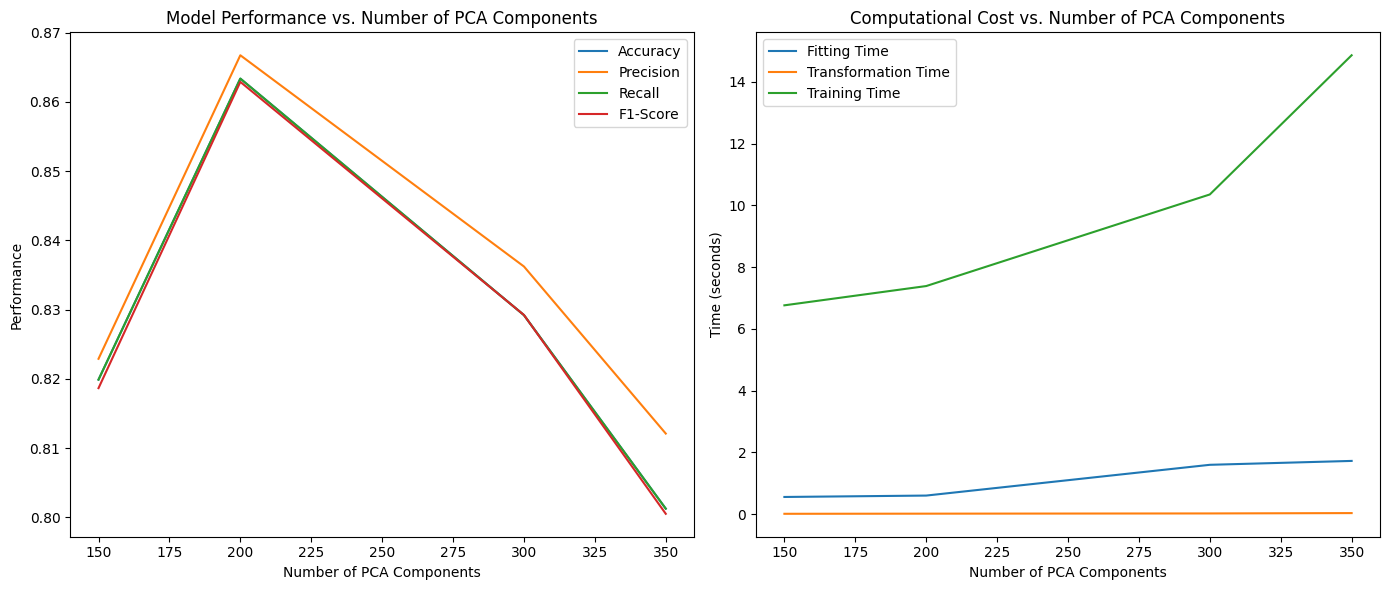

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(pca_components, pca_accuracy, label='Accuracy')
plt.plot(pca_components, pca_precision, label='Precision')
plt.plot(pca_components, pca_recall, label='Recall')
plt.plot(pca_components, pca_f1_score, label='F1-Score')
plt.xlabel('Number of PCA Components')
plt.ylabel('Performance')
plt.title('Model Performance vs. Number of PCA Components')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pca_components, pca_fit_times, label='Fitting Time')
plt.plot(pca_components, pca_transform_times, label='Transformation Time')
plt.plot(pca_components, pca_train_times, label='Training Time')
plt.xlabel('Number of PCA Components')
plt.ylabel('Time (seconds)')
plt.title('Computational Cost vs. Number of PCA Components')
plt.legend()

plt.tight_layout()
plt.show()

Baseline Model Performance (No Dimensionality Reduction):
                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.69      0.62        13
     Colin Powell       0.80      0.92      0.85        60
  Donald Rumsfeld       0.74      0.63      0.68        27
    George W Bush       0.92      0.92      0.92       146
Gerhard Schroeder       0.81      0.84      0.82        25
      Hugo Chavez       1.00      0.67      0.80        15
       Tony Blair       0.84      0.72      0.78        36

         accuracy                           0.85       322
        macro avg       0.81      0.77      0.78       322
     weighted avg       0.85      0.85      0.85       322



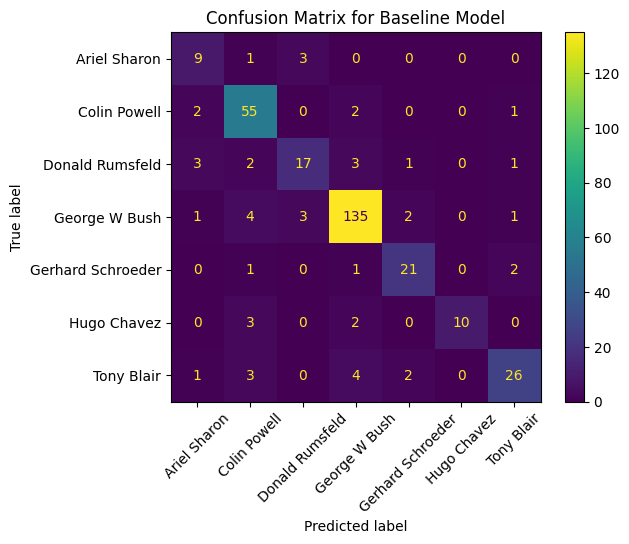

In [ ]:
# Train SVM on the original dataset
param_grid = {'C': loguniform(1e3, 1e4), 'gamma': loguniform(0.0001, 0.001)}
clf_baseline = RandomizedSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, n_iter=10, cv=5, random_state=42)

start_time = time.time()
clf_baseline.fit(X_train, y_train)
baseline_train_time = time.time() - start_time

# Predict and evaluate baseline model
y_pred_baseline = clf_baseline.predict(X_test)
baseline_report = classification_report(y_test, y_pred_baseline, target_names=target_names, output_dict=True)

print("Baseline Model Performance (No Dimensionality Reduction):")
print(classification_report(y_test, y_pred_baseline, target_names=target_names))

ConfusionMatrixDisplay.from_estimator(clf_baseline, X_test, y_test, display_labels=target_names, xticks_rotation=45)
plt.title("Confusion Matrix for Baseline Model")
plt.show()
